# Beamforming first simulations

In [6]:
import numpy as np
from scipy import constants

In [37]:
# Simulate 1D signals using th Gaussian distribution
# Let j be the number of antennas a uniform linear array and d the distance between them in m
j = 10
d = 5 
theta = 2

# Set short-term integration interval and frequence
N = 1
f0 = 1
theta0 = 45

# For now, we only consider a single source image, the source is considered static over tiùe and frequence
# Simulate source signal as a Gaussien variable
sigma = 1
s = np.random.normal(0,sigma,N)

In [38]:
# positions of the antennas and the source
# are they necessary ?

In [39]:
# Compute the steering vector

# Speed of light
c = constants.c
# Compute the geometrical delay tau 
tau = d*np.sin(theta0)/c
# delay array
J = np.arange(0,10)
a = np.exp(-j*2*np.pi*f0*J*tau)

In [75]:
# compute the received signal : Represent signal delay across array as a delay line
n = np.random.normal(0,1,10)
x = s*a.T + n
x

array([1.22100952, 0.15601354, 3.91082903, 1.91615262, 0.71282238,
       0.07893159, 1.95661777, 0.43377961, 0.1411212 , 2.22200483])

In [120]:
# Compute correlation matrix
R = x*x.T/N

In [118]:
R

29.969513535064053

In [119]:
np.matmul(x,x.T)

29.969513535064053

In [116]:
R.shape

(10,)

In [110]:
a

array([1.        , 0.99999911, 0.99999822, 0.99999732, 0.99999643,
       0.99999554, 0.99999465, 0.99999376, 0.99999287, 0.99999197])

In [109]:
np.conjugate(a)

array([1.        , 0.99999911, 0.99999822, 0.99999732, 0.99999643,
       0.99999554, 0.99999465, 0.99999376, 0.99999287, 0.99999197])

In [115]:
a*R@a

29.96931277522456

In [106]:
# Compute beam 
# theta varies between -pi and pi
thetas = np.linspace(-180,180,100)

beams = []
for theta in thetas:
    tau = d*np.sin(theta)/c
    w = np.exp(-j*2*np.pi*f0*J.T*tau)
    B = w*R*w.T
    beams.append(B)

In [105]:
thetas

array([-180,  -80,   20,  120])

In [103]:
beams

[array([1.49086425e+00, 2.43401853e-02, 1.52945324e+01, 3.67162238e+00,
        5.08112337e-01, 6.23014431e-03, 3.82831452e+00, 1.88162534e-01,
        1.99149244e-02, 4.93723087e+00]),
 array([1.49086425e+00, 2.43401755e-02, 1.52945200e+01, 3.67161793e+00,
        5.08111516e-01, 6.23013172e-03, 3.82830525e+00, 1.88162002e-01,
        1.99148601e-02, 4.93721292e+00]),
 array([1.49086425e+00, 2.43401796e-02, 1.52945252e+01, 3.67161980e+00,
        5.08111861e-01, 6.23013701e-03, 3.82830914e+00, 1.88162226e-01,
        1.99148871e-02, 4.93722046e+00]),
 array([1.49086425e+00, 2.43401966e-02, 1.52945465e+01, 3.67162747e+00,
        5.08113276e-01, 6.23015871e-03, 3.82832514e+00, 1.88163143e-01,
        1.99149981e-02, 4.93725141e+00])]

## Beam response plot
Fix w and plot $|y[n]|$ as a function of signal arrival angle $\theta$

In [81]:
import matplotlib.pyplot as plt

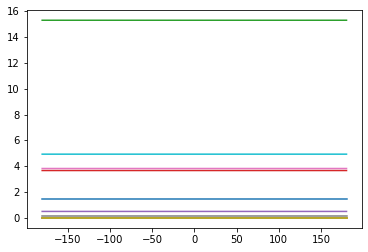

In [107]:
plt.plot(thetas, beams)

In [ ]:
bea